# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [ ]:
def find_sum(a: int, d: int, N: int) -> float:
    # либо неправильно делаю что-то
    # "сделаем в лоб" почему-то не работает,
    # видимо из-за приколов с плавающим типом, поэтому формулу сделаем
    result = (1.0 / d) * np.log((2 * a + (2 * N - 1) * d) / (2 * a - d))
    return result

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

3.044522437723423


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    # раз гора не идет к магомеду, магомед уничтожит гору
    # создадим две переменные, для переворота числа исходного с ног на голову
    # без конверта в стрчоку
    # цель: сравнение на равенство исходного и перевернутого чисел
    given = N
    # перевертыш храним
    convert = 0
    # пока не рассмотрим все цифры числа исходного
    while given > 0:
      # перевертыш: узнаем послед цифру исх-го числа
      # с каждой итерацией сдвигаем перевертыш на цифру влево и доб след с конца
      # цифру исходника
      convert = given % 10 + convert * 10
      # а исх-го на цифру вправо для знания след цифры
      given //= 10
    # цель достигнута: исходник и перевертыш при рав-ве - True с пом-ю bool
    check_palindrome = bool(N == convert)
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    begin = 42
    palindromes = []
    # надеюсь, что логику не надо объяснять
    # все достаточно просто
    while N > 0:
      if check_palindrome(begin):
        palindromes.append(begin)
        N -= 1
      begin += 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [ ]:
from random import randint

# мда, заставляет голову включать, минус нервы
# пришлось на бумажке рисовать
def find_median(a, b, c):
    # смотрим на знаки при + - или наоборот медианой будет число а
    if (a - b) * (a - c) <= 0:
      return a
    # смотрим на знаки при + + или - - медианой будет число b
    if (a - b) * (b - c) > 0:
      return b
    return c

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

-4 -64 87 	Median: -4
-73 5 2 	Median: 2
96 -42 52 	Median: 52
-49 94 69 	Median: 69
43 8 -44 	Median: 8
9 -67 57 	Median: 9
75 -9 -13 	Median: -9
-28 49 -5 	Median: -5
-33 -69 77 	Median: -33
24 98 89 	Median: 89


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [ ]:
my_array = np.random.normal(0, 1, 12)
# нормирование делаем
my_array = my_array / (sum(my_array) / 15)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.000000000000004


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):
    diff = np.abs(a - b)
    distance = np.sum(diff)
    return distance

def calculate_euclidean(a, b):
    # diff = (a - b) ** 2
    # dist = np.sum(diff)
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):
    # diff = np.abs(a - b)
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    dist = np.sqrt(np.sum(a ** 2)) * np.sqrt(np.sum(b ** 2))
    distance = 1 - (np.dot(np.transpose(a), b) / dist)
    return distance

In [ ]:
a = np.random.normal(5, 4, 12)
b = np.random.normal(5, 4, 12)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 72.47811592871928
Euclidean distance: 24.510220281802727
Chebyshev distance: 13.056303246566568
Cosine distance: 0.6381457729718312


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [ ]:
def transform(array):
    # можем отнять любое число, это не поменяет отношения между числами
    # отнимаем мин число чтоб оно стало 0
    if np.min(array) < 0:
      array -= np.min(array)
    # превращаем в доли, нормируем от 0 до 1
    array = array / np.sum(array)
    # домножаем на отношение 16 и макс числа, чтоб макс число стало 16, а потом
    # отнимаем 6 чтоб мин было -6 а макс 10
    transformed_array = array * (16 / np.max(array))  - 6
    return transformed_array

In [ ]:
my_array = np.random.randint(-5, high=10, size=42, dtype=int)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[10.          7.71428571 -4.85714286  2.          7.71428571 10.
  3.14285714  4.28571429 -6.          5.42857143 -6.          5.42857143
 -1.42857143 -6.          4.28571429 -4.85714286 -0.28571429  2.
  2.          5.42857143 -4.85714286  7.71428571 -1.42857143 10.
 -1.42857143  6.57142857 -3.71428571  6.57142857  2.          7.71428571
  0.85714286 -2.57142857 -0.28571429 10.         -0.28571429 -4.85714286
  0.85714286  2.          8.85714286  3.14285714  3.14285714  4.28571429]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [ ]:
my_array = np.random.randint(-12, high=4, size=30, dtype=int).reshape((10, 3))
selected_column = np.unravel_index(np.argmin(my_array, axis=None), my_array.shape)[1]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[ -6  -7  -3]
 [-12  -8   2]
 [ -9  -9  -7]
 [ -7   3  -1]
 [  2  -7  -8]
 [ -7 -10   3]
 [ -8   3  -3]
 [  2   0 -10]
 [  1  -6  -5]
 [ -8  -3  -4]]
Selected column: 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.14556445 0.10403045 0.49614546 0.46068358 0.91292386
        nan 0.60067485        nan 0.24380372]


In [ ]:
def replace_missing(arr):
    # заполнили средними значениями
    per = np.nanquantile(arr, 0.5)
    arr[np.isnan(arr)] = per
    array_without_missing = arr
    return array_without_missing

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.46068358 0.14556445 0.10403045 0.49614546 0.46068358 0.91292386
 0.46068358 0.60067485 0.46068358 0.24380372]


**Answer:** логично заполнить их средними значениями

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [4]:
def stats_channel(X):
    arr = np.concatenate(X).transpose()
    std = arr.std(axis=1)
    median = np.median(arr, axis=1)
    return median, std

In [5]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-1., -2., -2.]), array([5.44012119, 5.54528112, 5.6758064 ]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [12]:
def get_unique_values(X):
    result = np.unique(X, axis=1)
    return result

In [13]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 5 5]
  [4 5 5]
  [4 5 5]]

 [[4 5 5]
  [5 4 4]
  [4 4 4]]

 [[4 5 5]
  [4 4 4]
  [5 4 5]]

 [[5 4 5]
  [5 4 5]
  [4 5 5]]

 [[4 4 5]
  [4 4 5]
  [5 4 4]]

 [[5 5 5]
  [5 4 4]
  [4 4 5]]

 [[5 4 4]
  [4 5 5]
  [5 4 5]]

 [[5 4 4]
  [4 4 5]
  [4 4 4]]

 [[5 5 5]
  [5 4 5]
  [5 5 5]]

 [[5 5 5]
  [4 5 5]
  [5 4 5]]

 [[5 4 4]
  [4 5 5]
  [5 5 5]]

 [[4 5 4]
  [5 4 5]
  [4 4 5]]

 [[4 4 4]
  [5 4 5]
  [4 4 4]]

 [[5 5 5]
  [5 4 4]
  [4 5 4]]

 [[4 4 5]
  [4 5 5]
  [5 4 5]]

 [[5 4 5]
  [4 4 5]
  [5 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 5]]

 [[4 4 5]
  [5 4 5]
  [5 4 4]]

 [[4 5 4]
  [4 5 5]
  [5 5 5]]]
Unique :


array([[[4, 5, 5],
        [4, 5, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 4, 4]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 4, 4]],

       [[4, 5, 5],
        [5, 4, 5],
        [5, 4, 5]],

       [[5, 4, 4],
        [4, 4, 5],
        [4, 4, 5]],

       [[4, 4, 5],
        [5, 5, 5],
        [5, 4, 4]],

       [[5, 4, 5],
        [5, 4, 4],
        [4, 5, 5]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 4, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 4, 5]],

       [[5, 4, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[5, 5, 5],
        [5, 4, 4],
        [4, 5, 5]],

       [[4, 4, 5],
        [4, 5, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 4, 5]],

       [[4, 5, 4],
        [5, 5, 5],
        [5, 4, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [4, 5, 5]],

       [[5, 5, 5],
        [5, 4, 5],
        [4, 4, 5]],

       [[5, 4, 5],
        [4, 4, 4],
        [5, 5, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [ ]:
dataset =  pd.read_csv('titanic.csv', index_col=0)
dataset.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

1. Age, Cabin, Embarked
2. 0.3838383838383838
3. Male
4. Q
5. 3
6. 32.2 Look at the task

In [ ]:
print('1 task')
print(dataset.isna().sum())
print('2 task')
print(dataset['Survived'][dataset['Survived'] == True].sum() / len(dataset['Survived']))
print(dataset['Pclass'].value_counts())
print('3 task')
print(dataset['Sex'].value_counts())
print('4 task')
print(dataset['Embarked'].value_counts())
print('5 task')
print(len(dataset['Pclass'].unique()))
print('6 task')
print(dataset['Fare'].mean())
print(dataset.groupby('Pclass').mean()['Fare'])

1 task
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
2 task
0.3838383838383838
3    491
1    216
2    184
Name: Pclass, dtype: int64
3 task
male      577
female    314
Name: Sex, dtype: int64
4 task
S    644
C    168
Q     77
Name: Embarked, dtype: int64
5 task
3
6 task
32.204207968574636
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


<ipython-input-25-d0bf7c86c941>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(dataset.groupby('Pclass').mean()['Fare'])


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

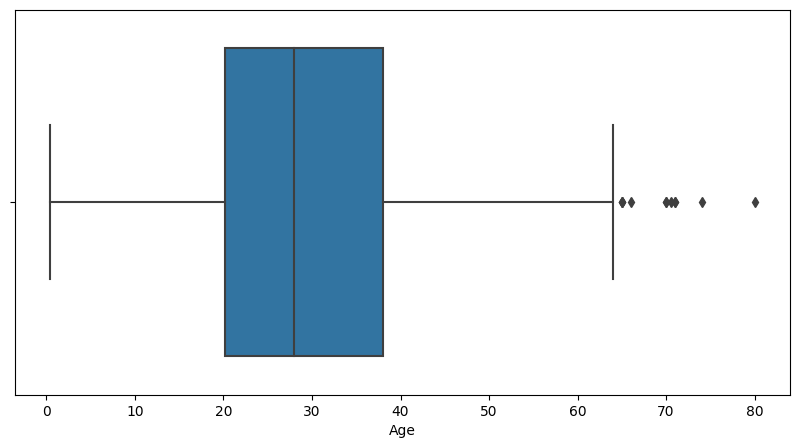

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = dataset['Age'])
plt.show()

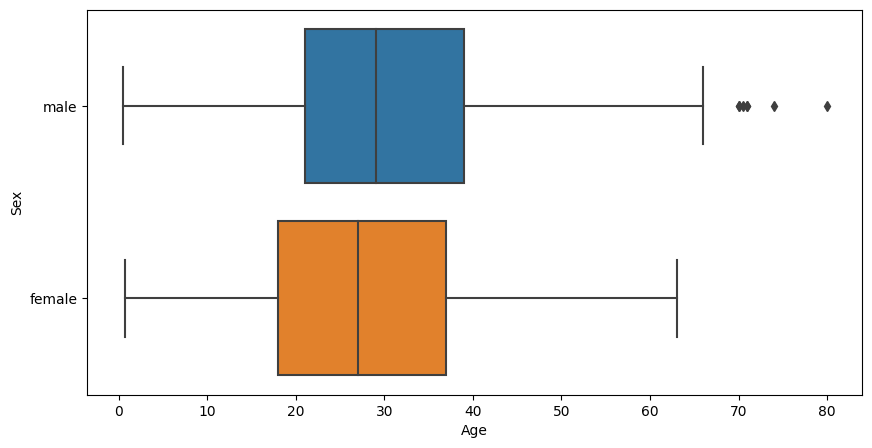

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = dataset['Age'], y = dataset['Sex'])
plt.show()

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [ ]:
ret = dataset['Name'].apply(lambda x: x.split()[1])
print('1')
print(len(ret.unique()))
print('2')
print(ret.value_counts())
print('3')
dataset['Ret'] = ret
print(dataset.groupby('Sex')['Ret'].value_counts())

1
31
2
Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Name, dtype: int64
3
Sex     Ret         
female  Miss.           179
        Mrs.            121
        Impe,             2
        Mlle.             2
        Planke,           2
        y                 2
        Dr.               1
        Gordon,           1
        Messemaeker,      1
        Mme.              1
        Ms.               1
        the      

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



In [ ]:
dataset[['Pclass', 'Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


<ipython-input-40-90bd106104d3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Pclass').mean()


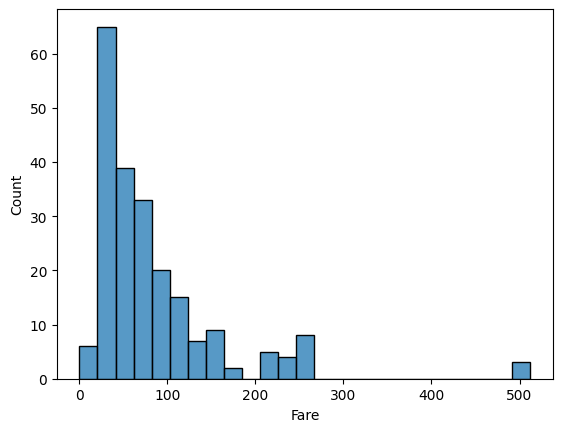

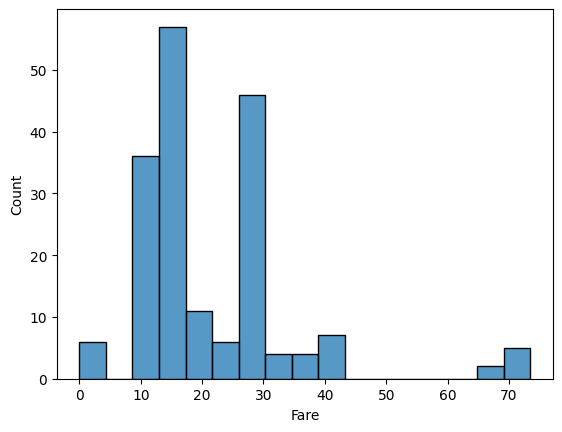

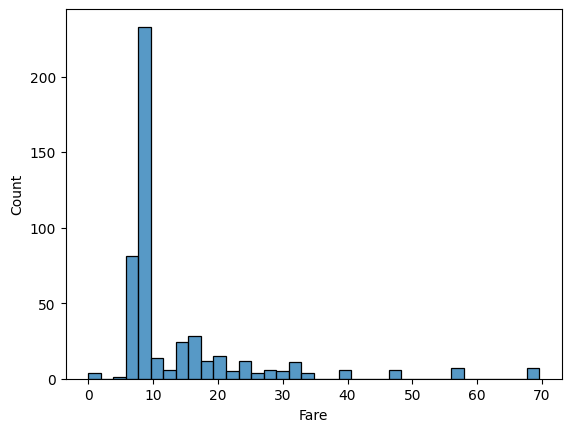

In [ ]:
dataset.groupby('Pclass').mean()
sns.histplot(data=dataset[dataset['Pclass'] == 1], x='Fare')
plt.show()
sns.histplot(data=dataset[dataset['Pclass'] == 2], x='Fare')
plt.show()
sns.histplot(data=dataset[dataset['Pclass'] == 3], x='Fare')
plt.show()

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

<ipython-input-44-bf27507a5ae3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Embarked').mean()


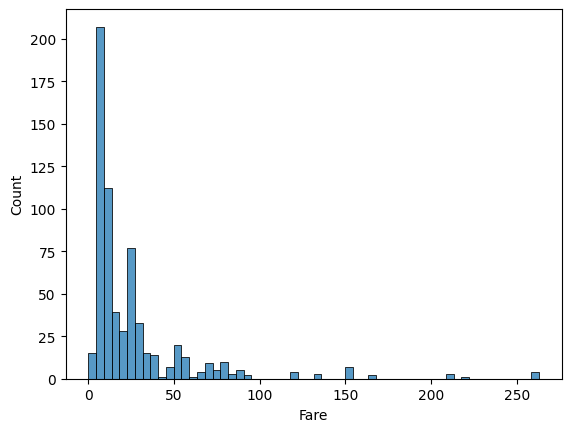

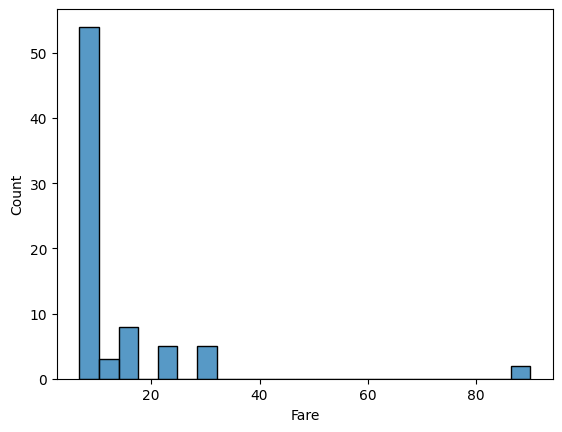

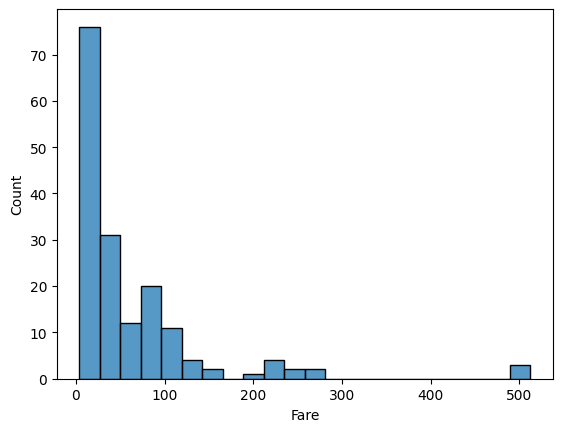

In [ ]:
dataset.groupby('Embarked').mean()
sns.histplot(data=dataset[dataset['Embarked'] == 'S'], x='Fare')
plt.show()
sns.histplot(data=dataset[dataset['Embarked'] == 'Q'], x='Fare')
plt.show()
sns.histplot(data=dataset[dataset['Embarked'] == 'C'], x='Fare')
plt.show()

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

<ipython-input-53-844d5962e21c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['Survived', 'Pclass']).mean()


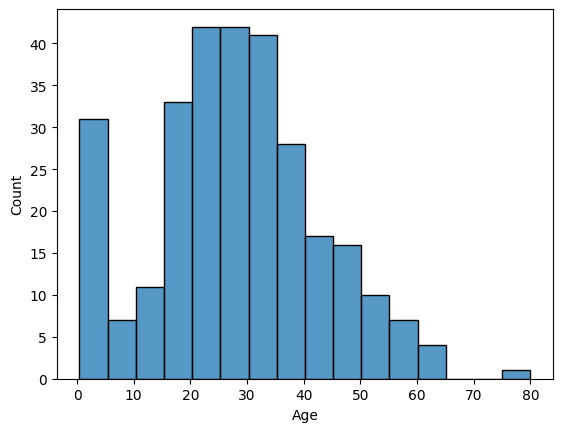

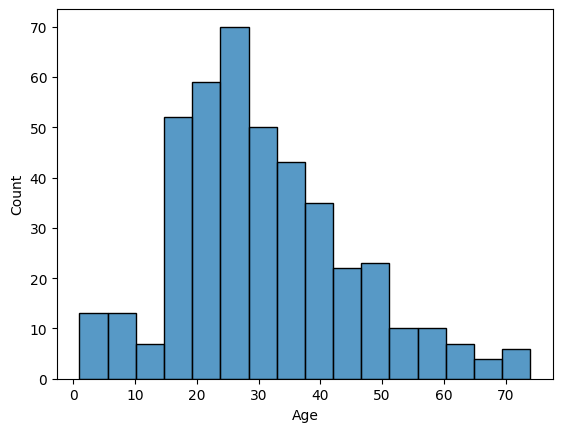

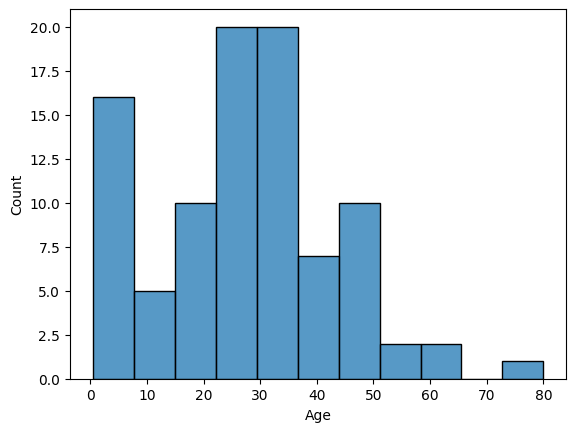

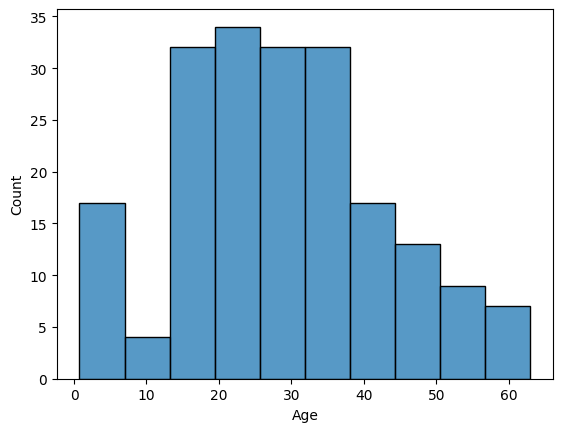

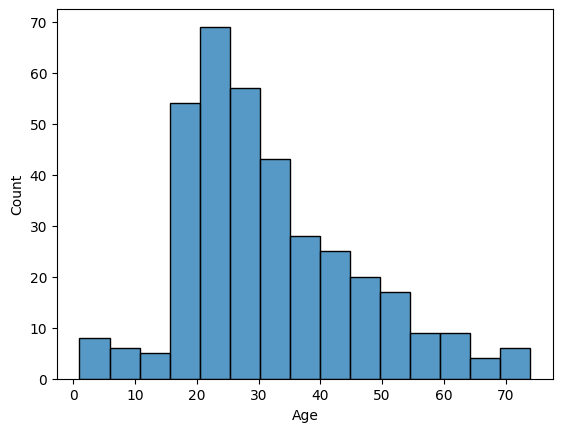

<Axes: xlabel='Age', ylabel='Count'>

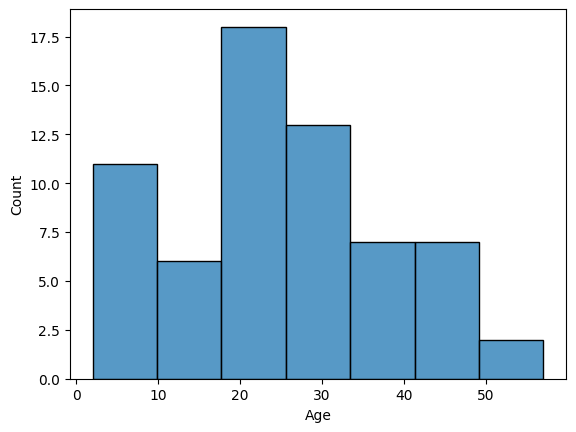

In [ ]:
dataset.groupby(['Survived', 'Pclass']).mean()
sns.histplot(data=dataset[dataset['Survived'] == True], x='Age')
plt.show()
sns.histplot(data=dataset[dataset['Survived'] == False], x='Age')
plt.show()
sns.histplot(data=dataset[(dataset['Survived'] == True) & (dataset['Sex'] == 'male')], x='Age')
plt.show()
sns.histplot(data=dataset[(dataset['Survived'] == True) & (dataset['Sex'] == 'female')], x='Age')
plt.show()
sns.histplot(data=dataset[(dataset['Survived'] == False) & (dataset['Sex'] == 'male')], x='Age')
plt.show()
sns.histplot(data=dataset[(dataset['Survived'] == False) & (dataset['Sex'] == 'female')], x='Age')